# Data preprocessing (MinMax Scaler)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("winequality-red.csv")

In [6]:
# Distribution of data
# Generate descriptive statistics of the DataFrame and transpose the result 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
import seaborn as sns

In [8]:
# Define a function to display a KDE plot for the specified column in the DataFrame

def display_kde(col_name):
    
    sns.kdeplot(df[col_name], shade=True)

    # Print the skewness and kurtosis of the "fixed acidity"
    print(f"Skewness: {df[col_name].skew():.2f}, Kurtosis: {df[col_name].kurt():.2f}")

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [10]:
minmax = MinMaxScaler()

In [11]:
# This function applies a logarithmic transformation and min-max normalisation
# to the specified column in the DataFrame

def display_transform_kde(col_name):
    df[col_name] = np.log1p(df[col_name]) # Apply log transformation
    df[[col_name]] = minmax.fit_transform(df[[col_name]])
    sns.kdeplot(df[col_name], shade=True)
    print(f"Skewness: {df[col_name].skew():.2f}, Kurtosis: {df[col_name].kurt():.2f}")

Skewness: 0.67, Kurtosis: 1.23


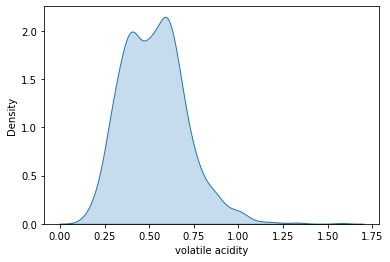

In [12]:
# Create a KDE plot for the "volatile acidity"

display_kde("volatile acidity")

Skewness: 0.27, Kurtosis: 0.18


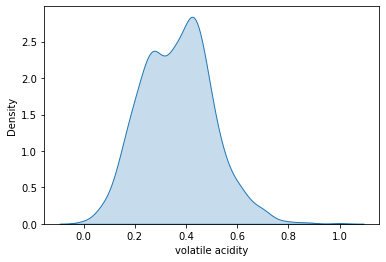

In [20]:
# Standardised KDE

display_transform_kde("volatile acidity")

# Mean Shift Train Model

In [13]:
# Mean shift clustering label

if "quality" in df.columns:
    df["original_labels"] = df["quality"]
    del df["quality"]
    
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,original_labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Copy a dataframe for training model
data_mean_shift = df.copy()
data_mean_shift.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,original_labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth 

In [16]:
# Estimate the bandwidth of the MeanShift algorithm
bandwidth = estimate_bandwidth(data_mean_shift, quantile=0.1)

In [17]:
# Create and fit the MeanShift clustering model using the estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth).fit(data_mean_shift)

In [26]:
mean_shift.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
# Assign cluster labels starting from 1
data_mean_shift["pred_cluster_labels"] = (mean_shift.labels_ + 1).tolist()

In [28]:
data_mean_shift.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,original_labels,pred_cluster_labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


# Fine tuning model 
# Find the best value of "Quantile"

In [29]:
from sklearn import metrics

In [30]:
import matplotlib.pyplot as plt

In [35]:
# Define a function to select the best Quantile

def select_q(data, q_range):
    df = data.copy()
    scores = dict() 
    for q in q_range:
        bandwidth = estimate_bandwidth(data_mean_shift, quantile=q)
        mean_shift = MeanShift(bandwidth=bandwidth).fit(data_mean_shift)
        df["pred_cluster_labels"] = (mean_shift.labels_ + 1).tolist()
        pred_labels = df["pred_cluster_labels"]
        
        # For Comparison
        labels = df["original_labels"]
        residual_error = 0
        
        print(f"# q = {q} =>")
        
        homogeneity_residual_error = 1 - metrics.homogeneity_score(labels, pred_labels)
        print(f"- Homogeneity Score: {homogeneity_residual_error}")
        
        completeness_residual_error = 1 - metrics.completeness_score(labels, pred_labels)
        print(f"- Completeness Score: {completeness_residual_error}")
                                       
        adjusted_rand_residual_error = 1 - metrics.adjusted_rand_score(labels, pred_labels)
        print(f"-  Adjusted Rand Score: {adjusted_rand_residual_error}")
        
        silhouette_residual_error = 1 - metrics.silhouette_score(df, pred_labels, metric="euclidean", sample_size=df.shape[0])
        print(f"-  Silhouette Score: {silhouette_residual_error}")   
                                     
        scores[f"q_{q}"] = homogeneity_residual_error + completeness_residual_error + adjusted_rand_residual_error + silhouette_residual_error
        print(f"Total error = {scores[f'q_{q}']}")
        
    lists = scores.items()
    
    # Display "lists"
    x, y = zip(*lists)
    plt.plot(x, y)
    plt.show()

# q = 0.1 =>
- Homogeneity Score: 0.9447602617049164
- Completeness Score: 0.9446578340506476
-  Adjusted Rand Score: 1.0234083608348574
-  Silhouette Score: 0.5630568184935512
Total error = 3.4758832750839725
# q = 0.2 =>
- Homogeneity Score: 0.9562245732800945
- Completeness Score: 0.9379357055066703
-  Adjusted Rand Score: 1.0159397808682489
-  Silhouette Score: 0.47440917011648787
Total error = 3.384509229771501
# q = 0.3 =>
- Homogeneity Score: 0.9736454549392031
- Completeness Score: 0.8862404309036227
-  Adjusted Rand Score: 1.0096154191349151
-  Silhouette Score: 0.4040950033007066
Total error = 3.2735963082784476
# q = 0.4 =>
- Homogeneity Score: 0.9991604217661866
- Completeness Score: 0.9529908460399402
-  Adjusted Rand Score: 0.9987824522813015
-  Silhouette Score: 0.2542566181800977
Total error = 3.205190338267526
# q = 0.5 =>
- Homogeneity Score: 0.9982890764662066
- Completeness Score: 0.8840820447318745
-  Adjusted Rand Score: 0.9985087193696957
-  Silhouette Score: 0.2

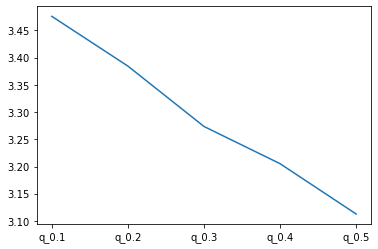

In [37]:
select_q(df, [0.1, 0.2, 0.3, 0.4, 0.5])